<a href="https://colab.research.google.com/github/jsilryan/Deep-Learning-Practice/blob/master/Sign_Language_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Start

### Import PyTorch and Setup Device Agnostic Code

In [9]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Get Data

In [10]:
import requests
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "sign_language"

if image_path.is_dir():
  print(f"{image_path} directory already exists...")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents = True, exist_ok = True)

data/sign_language directory already exists...


### Mount Google drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
drive_path = "drive/MyDrive"
sign_lang_csv = drive_path + "/Sign_Lang"
sign_lang_images = drive_path + "/Sign_Lang_Images"

In [13]:
import pandas as pd
train_csv = sign_lang_csv + "/Train.csv"
test_csv = sign_lang_csv + "/Test.csv"
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [14]:
total_rows = len(train_df.index) + 1
total_rows

6250

### Random splitting of the labeled data into train and test datasets

In [15]:
import pandas as pd
csv_path = data_path / "labeled_csv"
train_csv = csv_path / "train.csv"
test_csv = csv_path / "test.csv"

if csv_path.is_dir():
  print(f"{csv_path} directory already exists...")
else:
  print(f"{csv_path} does not exist, creating one...")
  csv_path.mkdir(parents = True, exist_ok = True)



data/labeled_csv does not exist, creating one...


In [16]:
# Data shuffling
new_train_df = train_df.sample(frac = 1).reset_index(drop = True)

# Split size
split_size = int(0.8 * len(new_train_df))

# Split the data
train_data = new_train_df[:split_size]
test_data = new_train_df[split_size:]

# Save splits to csv files
train_data.to_csv(train_csv, index = False)
test_data.to_csv(test_csv, index = False)

print(f"Training data saved to {train_csv}")
print(f"Test data saved to {test_csv}")

Training data saved to data/labeled_csv/train.csv
Test data saved to data/labeled_csv/test.csv


In [17]:
# Read the csv files
labeled_train_df = pd.read_csv(train_csv)
labeled_test_df = pd.read_csv(test_csv)

In [18]:
labeled_train_df.head()

,img_IDS,Label
0,ImageID_M5CVWMK5,Love
1,ImageID_OZ699TRQ,Enough/Satisfied
2,ImageID_S6BM18WM,Church
3,ImageID_7Y5DFOAE,Love
4,ImageID_EY2M5GYX,Enough/Satisfied


In [19]:
labeled_test_df.head()

,img_IDS,Label
0,ImageID_IWX6D6E7,Love
1,ImageID_41ZX4LS9,Temple
2,ImageID_UQ93XEM0,You
3,ImageID_NG15RRM0,Mosque
4,ImageID_1FLZIUF2,You


In [20]:
test_df.head()

,img_IDS
0,ImageID_USRB8QNG
1,ImageID_SZ8D1ZJI
2,ImageID_4OJO2F8J
3,ImageID_IEE4XV0B
4,ImageID_BP0O0WZ9


### Get training labels

In [21]:
labels = train_df.iloc[:, 1].unique()
labels

array(['Temple', 'Church', 'Enough/Satisfied', 'Me', 'Love', 'Mosque',
       'You', 'Friend', 'Seat'], dtype=object)

In [22]:
labeled_path = image_path / "train_labeled"
labeled_train_path = labeled_path / "train"
labeled_test_path = labeled_path / "test"

for i in range(len(labels)):
  if labels[i] == "Enough/Satisfied":
    labels[i] = "Enough"
  train_new_path = labeled_train_path / labels[i]
  test_new_path = labeled_test_path / labels[i]

  # Create train_data directory
  if train_new_path.is_dir():
    print(f"{train_new_path} directory already exists. Skipping download...")
  else:
    print(f"{train_new_path} does not exist. Creating one... ")
    train_new_path.mkdir(parents = True, exist_ok = True)

  # Create test_data directory
  if test_new_path.is_dir():
    print(f"{test_new_path} directory already exists. Skipping download...")
  else:
    print(f"{test_new_path} does not exist. Creating one... ")
    test_new_path.mkdir(parents = True, exist_ok = True)

data/sign_language/train_labeled/train/Temple does not exist. Creating one... 
data/sign_language/train_labeled/test/Temple does not exist. Creating one... 
data/sign_language/train_labeled/train/Church does not exist. Creating one... 
data/sign_language/train_labeled/test/Church does not exist. Creating one... 
data/sign_language/train_labeled/train/Enough does not exist. Creating one... 
data/sign_language/train_labeled/test/Enough does not exist. Creating one... 
data/sign_language/train_labeled/train/Me does not exist. Creating one... 
data/sign_language/train_labeled/test/Me does not exist. Creating one... 
data/sign_language/train_labeled/train/Love does not exist. Creating one... 
data/sign_language/train_labeled/test/Love does not exist. Creating one... 
data/sign_language/train_labeled/train/Mosque does not exist. Creating one... 
data/sign_language/train_labeled/test/Mosque does not exist. Creating one... 
data/sign_language/train_labeled/train/You does not exist. Creating on

In [23]:
test_path = image_path / "test"
if test_path.is_dir():
  print(f"{test_path} directory already exists...")
else:
  print(f"{test_path} does not exist, creating one...")
  test_path.mkdir(parents = True, exist_ok = True)

data/sign_language/test does not exist, creating one...


### Get images

In [24]:
import os
file_list = os.listdir(sign_lang_images)
print(file_list[:10], len(file_list))

['ImageID_6VE3EHPG.jpg', 'ImageID_TDXY8PR5.jpg', 'ImageID_RGIP5LV9.jpg', 'ImageID_G51H1V64.jpg', 'ImageID_93G9NR3S.jpg', 'ImageID_LY416ETA.jpg', 'ImageID_IHGXGZD6.jpg', 'ImageID_DY6NR4DE.jpg', 'ImageID_CNKA0QG0.jpg', 'ImageID_HCJIQGNR.jpg'] 9091


### Copy Train Images from drive to the respective Train Data folder in Colab

In [25]:
import shutil
from tqdm.auto import tqdm

for image in tqdm(os.listdir(sign_lang_images)):
  # Splits the pathname into a pair (root, ext), where root is everything before the last period and ext is everything after the last period (including the period itself).
  file_name = os.path.splitext(image)[0]
  old_image_path = sign_lang_images + "/" + image
  for row in range(len(labeled_train_df)):
    if labeled_train_df.iloc[row, 0] == file_name:
      if labeled_train_df.iloc[row, 1] == "Enough/Satisfied":
        new_image_path = labeled_train_path / "Enough"
      else:
        new_image_path = labeled_train_path / labeled_train_df.iloc[row, 1]

      new_image_path = new_image_path / image

      if os.path.exists(new_image_path):
        continue
      else:
        shutil.copyfile(old_image_path, new_image_path)

  for row in range(len(labeled_test_df)):
    if labeled_test_df.iloc[row, 0] == file_name:
      if labeled_test_df.iloc[row, 1] == "Enough/Satisfied":
        new_image_path = labeled_test_path / "Enough"
      else:
        new_image_path = labeled_test_path / labeled_test_df.iloc[row, 1]

      new_image_path = new_image_path / image

      if os.path.exists(new_image_path):
        continue
      else:
        shutil.copyfile(old_image_path, new_image_path)

  0%|          | 0/9091 [00:00<?, ?it/s]

### Copy Test Images from drive to the Test Data folder in Colab

In [26]:
for image in tqdm(os.listdir(sign_lang_images)):
  file_name = os.path.splitext(image)[0]
  old_image_path = sign_lang_images + "/" + image
  for row in range(len(test_df)):
    if test_df.iloc[row, 0] == file_name:
      new_image_path = test_path / image

      if os.path.exists(new_image_path):
        continue
      else:
        shutil.copyfile(old_image_path, new_image_path)

  0%|          | 0/9091 [00:00<?, ?it/s]

In [ ]:
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

In [28]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/sign_language.
There are 0 directories and 2679 images in data/sign_language/test.
There are 2 directories and 0 images in data/sign_language/train_labeled.
There are 9 directories and 0 images in data/sign_language/train_labeled/test.
There are 0 directories and 142 images in data/sign_language/train_labeled/test/Seat.
There are 0 directories and 127 images in data/sign_language/train_labeled/test/Church.
There are 0 directories and 153 images in data/sign_language/train_labeled/test/Temple.
There are 0 directories and 125 images in data/sign_language/train_labeled/test/Friend.
There are 0 directories and 136 images in data/sign_language/train_labeled/test/Me.
There are 0 directories and 153 images in data/sign_language/train_labeled/test/Mosque.
There are 0 directories and 135 images in data/sign_language/train_labeled/test/Enough.
There are 0 directories and 119 images in data/sign_language/train_labeled/test/You.
There are 0 directories 

In [38]:
# Setup training and testing paths
train_dir = labeled_path / "train"
test_dir = labeled_path / "test"

train_dir, test_dir

(PosixPath('data/sign_language/train_labeled/train'),
 PosixPath('data/sign_language/train_labeled/test'))

## 2. Visualize an Image

Image Path: data/sign_language/train_labeled/train/Temple/ImageID_JJFLTDAJ.jpg
Image Label: Temple
Image height: 1280
Image width: 720


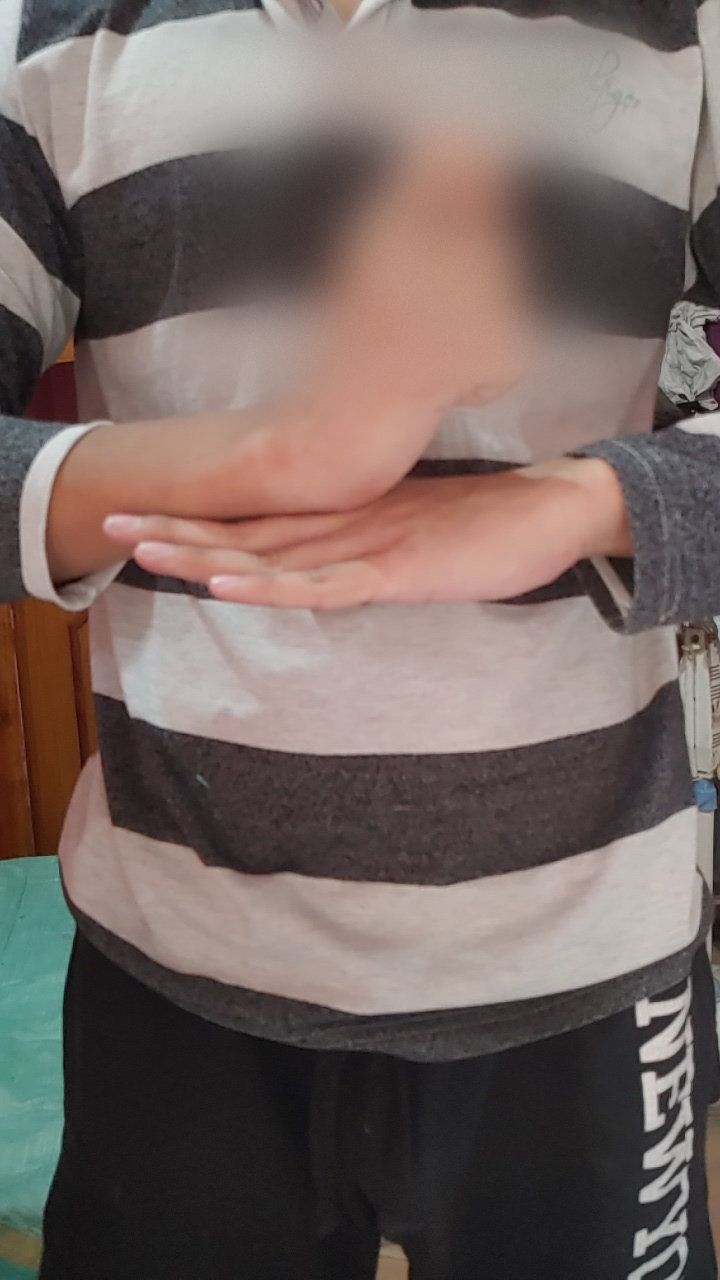

In [31]:
import random
from PIL import Image

train_image_path_list = list(labeled_path.glob("*/*/*.jpg"))

random_image_path = random.choice(train_image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

# Metadata
print(f"Image Path: {random_image_path}")
print(f"Image Label: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 719.5, 1279.5, -0.5)

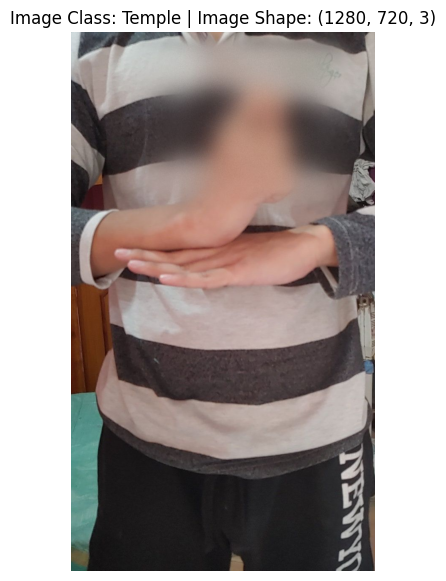

In [32]:
# Using Matplotlib
import numpy as np
import matplotlib.pyplot as plt

image_array = np.asarray(img)

# Plot
plt.figure(figsize = (10, 7))
plt.imshow(image_array)
plt.title(f"Image Class: {image_class} | Image Shape: {image_array.shape}")
plt.axis(False)

## 3. Transform the data

In [33]:
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

### Transform Data with transforms

In [34]:
train_transform = transforms.Compose([
    transforms.Resize(size = (128, 128)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize (size = (128, 128)),
    transforms.ToTensor()
])

In [35]:
train_transform(img).dtype

torch.float32

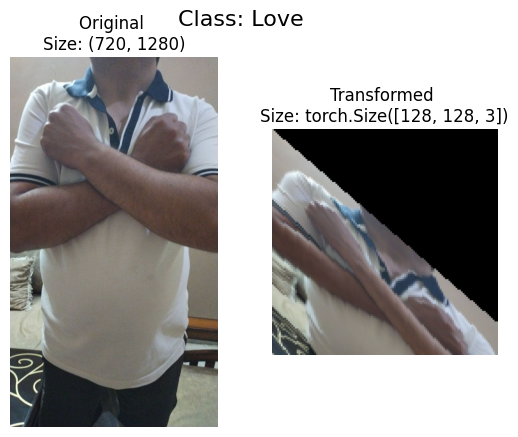

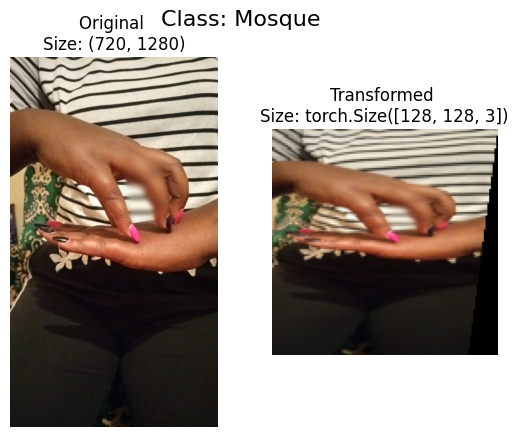

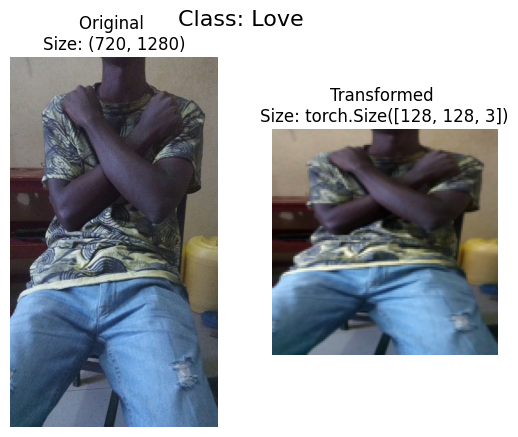

In [36]:
def plot_transformed_images(image_paths, transform, n = 3, seed = None):
  """Plots a number n of the transformed images with their original images"""
  if seed:
    random.seed(seed)

  random_images = random.sample(image_paths, k = n)

  for image_path in random_images:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)

plot_transformed_images(
    image_paths = train_image_path_list,
    transform = train_transform,
    n = 3,
    seed = None
)

In [37]:
test_image_path_list = list(test_path.glob("*.jpg"))
test_image_path_list[:10], len(test_image_path_list)

([PosixPath('data/sign_language/test/ImageID_JJ2SIF5L.jpg'),
  PosixPath('data/sign_language/test/ImageID_RV8U9ZLC.jpg'),
  PosixPath('data/sign_language/test/ImageID_R7I6W2X6.jpg'),
  PosixPath('data/sign_language/test/ImageID_ZXU4GYIL.jpg'),
  PosixPath('data/sign_language/test/ImageID_XY9TBH2E.jpg'),
  PosixPath('data/sign_language/test/ImageID_08F8MJSG.jpg'),
  PosixPath('data/sign_language/test/ImageID_YTY4CCX6.jpg'),
  PosixPath('data/sign_language/test/ImageID_G30TM8Q8.jpg'),
  PosixPath('data/sign_language/test/ImageID_KEUAZ4HU.jpg'),
  PosixPath('data/sign_language/test/ImageID_UGCNAXAK.jpg')],
 2679)

## 4. Load Images and put them to a DataLoader

### Load Images using `ImageFolder`

In [39]:
train_data = datasets.ImageFolder(
    root = train_dir,
    transform = train_transform,
    target_transform = None
)

test_data = datasets.ImageFolder(
    root = test_dir,
    transform = test_transform
)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 4999
     Root location: data/sign_language/train_labeled/train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 1250
     Root location: data/sign_language/train_labeled/test
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [44]:
# Class Names
class_names = train_data.classes
class_names

['Church', 'Enough', 'Friend', 'Love', 'Me', 'Mosque', 'Seat', 'Temple', 'You']

In [43]:
# Class Names and indexes
class_dict = train_data.class_to_idx
class_dict

{'Church': 0,
 'Enough': 1,
 'Friend': 2,
 'Love': 3,
 'Me': 4,
 'Mosque': 5,
 'Seat': 6,
 'Temple': 7,
 'You': 8}

In [42]:
# Length
len(train_data), len(test_data)

(4999, 1250)

In [45]:
# Information on the first image
img, label = train_data[0][0], train_data[0][1]

print(f"Image Tensor: {img}")
print(f"Class Name: {class_names[label]}")
print(f"Image Shape: {img.shape}")
print(f"Image Datatype: {img.dtype}")
print(f"Label datatype: {type(label)}")

Image Tensor: tensor([[[0.7216, 0.7216, 0.7569,  ..., 0.9529, 0.9725, 0.9020],
         [0.6941, 0.7020, 0.7373,  ..., 0.9490, 0.9412, 0.9255],
         [0.6863, 0.7333, 0.7529,  ..., 0.9020, 0.9373, 0.9843],
         ...,
         [0.3373, 0.2980, 0.2941,  ..., 0.6824, 0.7373, 0.9020],
         [0.3333, 0.3333, 0.3216,  ..., 0.7020, 0.7098, 0.7725],
         [0.3333, 0.3373, 0.3451,  ..., 0.7529, 0.7725, 0.8196]],

        [[0.5608, 0.4549, 0.4510,  ..., 0.9412, 0.9333, 0.8196],
         [0.5490, 0.4353, 0.3961,  ..., 0.9020, 0.8745, 0.8667],
         [0.5529, 0.4588, 0.3804,  ..., 0.7765, 0.8235, 0.9373],
         ...,
         [0.2196, 0.1843, 0.1725,  ..., 0.6078, 0.6549, 0.7961],
         [0.2078, 0.2196, 0.2157,  ..., 0.6118, 0.6275, 0.6824],
         [0.2157, 0.2235, 0.2588,  ..., 0.6471, 0.6667, 0.7059]],

        [[0.6353, 0.4196, 0.3333,  ..., 0.9255, 0.9216, 0.8157],
         [0.6235, 0.4235, 0.2863,  ..., 0.8549, 0.8235, 0.8549],
         [0.6314, 0.4745, 0.2745,  ..., 0.67

Text(0.5, 1.0, 'Church')

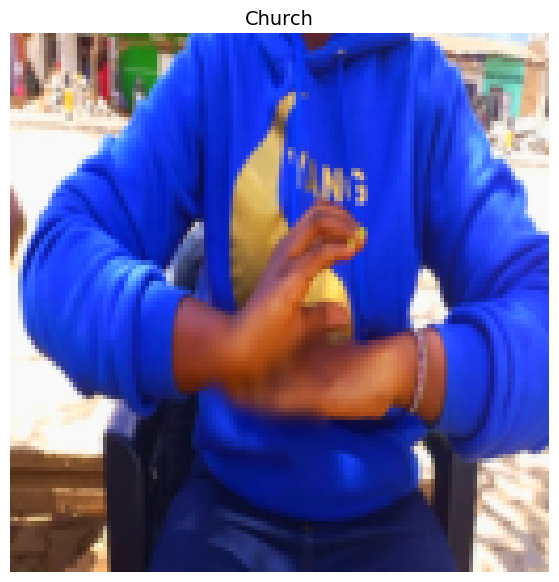

In [46]:
# Permute Image
img_permute = img.permute(1,2,0)

# Plot Image
plt.figure(figsize = (10, 7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize = 14)

### Turn Loaded Images to DataLoaders

In [47]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f53820755d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f53820774f0>)

## 5. Create a model: TinyVGG

In [48]:
class TinyVGG_Model_1(nn.Module):
  def __init__(
      self,
      input_shape: int,
      output_shape: int,
      hidden_units: int
  ):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels = input_shape,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size = 2,
            stride = 2
        )
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size = 2,
            stride = 2
        )
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features = hidden_units,
            out_features = output_shape
        )
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [49]:
model_1 = TinyVGG_Model_1(
    input_shape = 3,
    hidden_units = 10,
    output_shape = len(train_data.classes)
).to(device)

model_1

TinyVGG_Model_1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=9, bias=True)
  )
)

## 6. Create a `train_step`, `test_step` and `train_test` that combines both into 1 function